# Information Theory 信息论

Name: [李嘉惠]

本次作业的目的是检查你是否了解了自信息, 信息熵和KL散度的计算, 并且学会使用. 你需要补充的代码由###来代替.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Self-information 自信息

In [2]:
def self_information(p):
    """
    Function: Calculate the self-information of event
    Input:
              p:      The probability of event p(x), type: float
    Output:   
              return: The self-information of event
    """
    if p>1 or p<0:
        print("Error: Your input is not a probability of event!")
        return(0)  
    
    if p>=0 and p<=1:
        one_I = -math.log(p)
        print ("I=: ", one_I)
    return (one_I)

I=:  2.3025850929940455
I=:  1.6094379124341003
I=:  1.203972804325936
I=:  0.916290731874155
I=:  0.6931471805599453
I=:  0.5108256237659907
I=:  0.3566749439387323
I=:  0.2231435513142097
I=:  0.10536051565782628
I=:  -0.0


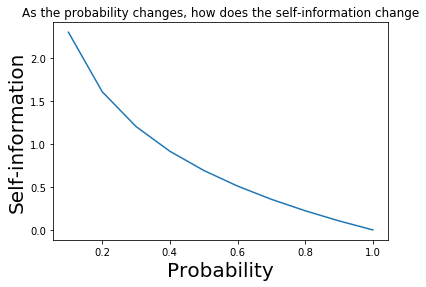

In [3]:
# As the probability of event changes, how does the self-information change
I = np.zeros(10)
for i in range(0, 10):
    p = 0.1*i+0.1
    I[i] = self_information(p)
plt.plot(np.arange(0.1, 1.1, 0.1), I)
plt.title("As the probability changes, how does the self-information change")
plt.xlabel("Probability", fontsize=20)
plt.ylabel("Self-information", fontsize=20)
plt.show()

# Entopy 信息熵

In [4]:
def entropy(P):
    """
    Function: Calculate the entopy of random variable
    Input:
              P:      The probability mass function(pmf) of random variable P, type: list or numpy.ndarray
    Output:   
              return: The entopy of random variable
    """
    P = np.array(P)
    
    # Determine whether the input is a probability distribution
    if P.sum()!=1 or P.max()>1 or P.min()<0:
        print("Error: Your input is not a pmf!")
        return(0)  
    
    if P.sum()==1 and P.max()<=1 and P.min()>=0:
        Q=np.log(P)
        entropy = -sum(P*Q)
        print("entropy: ",entropy)
    return (entropy)

entropy:  0.325082973391
entropy:  0.500402423538
entropy:  0.610864302055
entropy:  0.673011667009
entropy:  0.69314718056
entropy:  0.673011667009
entropy:  0.610864302055
entropy:  0.500402423538
entropy:  0.325082973391


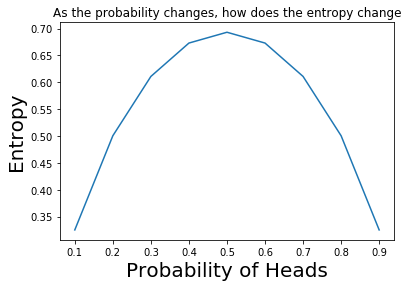

entropy:  0.69314718056
If the coin is normal, the entopy is 0.69
entropy:  0.0560015343548
If the coin is unnormal, the entopy is 0.06
entropy:  1.05492016799
If the weather is normal, the entopy is 1.05
entropy:  0.63903185965
If the weather is unnormal, the entopy is 0.64


In [5]:
# As the probability changes, how does the entropy change
p_entropy = np.zeros(9)
for i in range(1, 10):
    p = 0.1*i
    p_entropy[i-1] = entropy(np.array( [p, 1-p] ))
plt.plot(np.arange(0.1, 1, 0.1), p_entropy)
plt.title("As the probability changes, how does the entropy change")
plt.xlabel("Probability of Heads", fontsize=20)
plt.ylabel("Entropy", fontsize=20)
plt.show()

# This is the coin example
coin_normal_p = np.array([0.5, 0.5])
coin_normal_entopy = entropy(coin_normal_p)
print("If the coin is normal, the entopy is %.2f" % (coin_normal_entopy))

coin_unnormal_p = np.array([0.01, 0.99])
coin_unnormal_entopy = entropy(coin_unnormal_p)
print("If the coin is unnormal, the entopy is %.2f" % (coin_unnormal_entopy))

#you code(optional)
# If you think of other examples, you can be supplemented
weather_normal_p = np.array([0.4,0.4,0.2])
weather_normal_entopy = entropy(weather_normal_p)
print("If the weather is normal, the entopy is %.2f" % (weather_normal_entopy))

weather_unnormal_p = np.array([0.1,0.1,0.8])
weather_unnormal_entopy = entropy(weather_unnormal_p)
print("If the weather is unnormal, the entopy is %.2f" % (weather_unnormal_entopy))

# Kullback–Leibler Divergence KL散度

In [6]:
def KL_divergence(P, Q):
    """
    Function: Calculate the KL Divergence between two probability distributions P and Q.
    Input:
              P:      The pmf of random variable P, type: list or numpy.ndarray
              Q:      The approximate distribution of P, type: list or numpy.ndarray
    Output:   
              return: The KL Divergence between two probability distributions
    """
    P = np.array(P)
    Q = np.array(Q)
    
    # Determine whether the P and Q are the probability distribution.
    if P.sum()!=1 or P.max()>1 or P.min()<0:
        print("Error: The P is not a pmf!")
        return(0)
    if Q.sum()!=1 or Q.max()>1 or Q.min()<0:
        print("Error: The Q is not a pmf!")
        return(0)
    
    if P.sum()==1 or P.max()<=1 and P.min()<=0 and Q.sum()==1 and Q.max()>=1 and Q.min<=0:
        K=np.log(P/Q)
        KL_divergence = sum(P*K)
        print("KL_divergence: ",KL_divergence)
        return (KL_divergence)

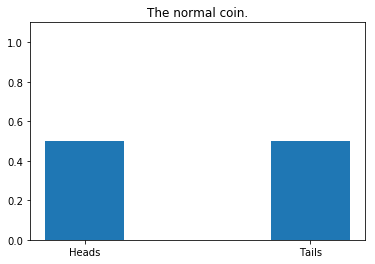

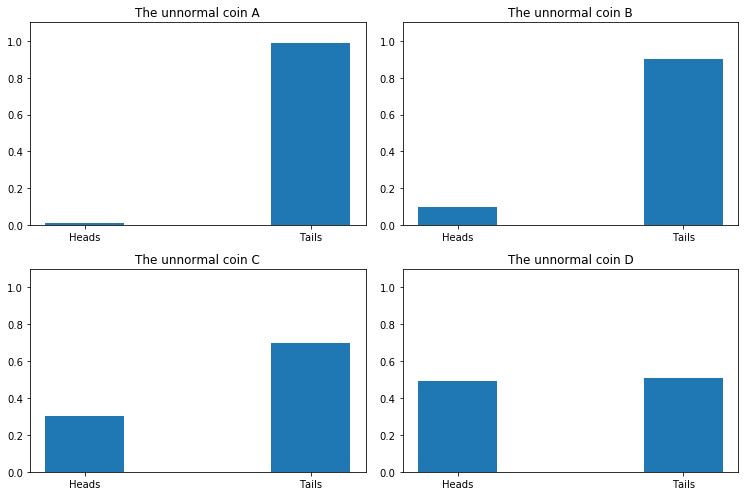

KL_divergence:  1.61446308036
KL_divergence:  0.510825623766
KL_divergence:  0.0871766935724
KL_divergence:  0.00020004001067


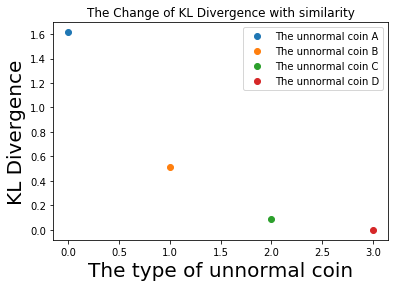

In [7]:
# This is the coin example
coin_normal_p = np.array([0.5, 0.5])

coin_unnormal_p = np.zeros([4, 2])
coin_unnormal_p[0,:] = np.array([0.01, 0.99])
coin_unnormal_p[1,:] = np.array([0.1, 0.9])
coin_unnormal_p[2,:] = np.array([0.3, 0.7])
coin_unnormal_p[3,:] = np.array([0.49, 0.51])

KL_div = np.zeros(4)

index = np.arange(2)
plt.bar(index, coin_normal_p, 0.35)
plt.ylim(0,1.1)
plt.xticks(index, ('Heads', 'Tails'))
plt.title("The normal coin.")
plt.show()

coin_type = "ABCD"
fig = plt.figure(figsize=(10.5,7))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.bar(index, coin_unnormal_p[i,:], 0.35)
    plt.ylim(0,1.1)
    plt.xticks(index, ('Heads', 'Tails'))
    plt.title("The unnormal coin " + coin_type[i])
plt.tight_layout()
plt.show()

for i in range(4):
    KL_div[i] = KL_divergence(coin_normal_p, coin_unnormal_p[i,:])
    name = "The unnormal coin " + coin_type[i]
    plt.plot(i, KL_div[i], 'o', label=name)
plt.title("The Change of KL Divergence with similarity")
plt.xlabel("The type of unnormal coin", fontsize=20)
plt.ylabel("KL Divergence", fontsize=20)
plt.legend(loc='best')
plt.show()

#you code(optional)
# If you think of other examples, you can be supplemented
####

如果你有什么疑问或者收获, 你可以在这里记录下来.

###